# Chicago crime detective EDA:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics as st
df=pd.read_csv("Chicago_Crime_Detective.csv")
#to find a median
st.median(df['Date'])


C:\Users\pooja\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'4/10/09 23:00'

# To find minimum no. of crimes per month


AxesSubplot(0.125,0.125;0.775x0.755)


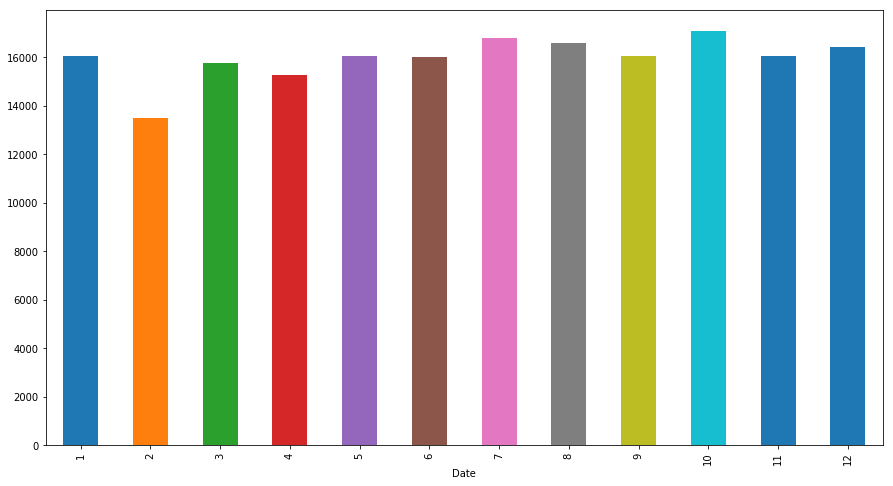

In [4]:
import seaborn as sb
plt.figure(figsize=(15,8))
df['Date'] = pd.to_datetime(df['Date'])
gp=df.groupby(df['Date'].dt.month)['Date'].count()
print(gp.plot(kind='bar'))

# which weekday did most motor vehicle thefts occur?

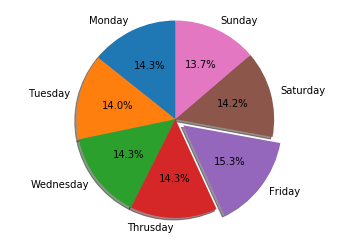

In [69]:

weekday=df.groupby(df['Date'].dt.weekday)['Date'].count()
weekday=list(weekday)
name='Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'
explode=(0,0,0,0,0.1,0,0)
plt.pie(weekday,explode=explode,labels=name,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()


# Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

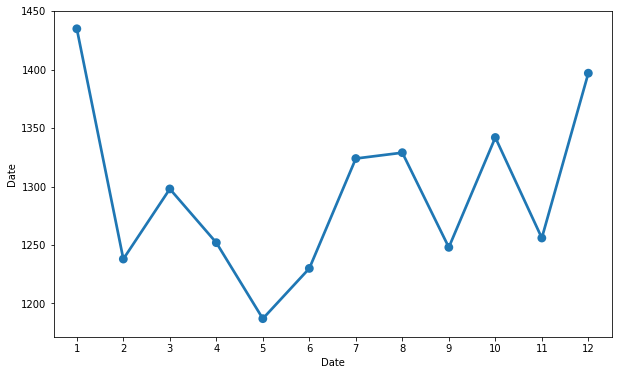

In [101]:
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
df3=df[df['Arrest']]
ct=df3.groupby(df3['Date'].dt.month)['Date'].count()
plt.figure(figsize=(10,6))
sns.pointplot(x=ct.index,y=ct,kind='point')


# For what proportion of motor vehicle thefts in 2007 was an arrest made? (round your answer to 2 decimal places) & For what proportion of motor vehicle thefts in 2001 was an arrest made? 

[Text(0,18567,'18517'),
 Text(1,16688,'16638'),
 Text(2,14909,'14859'),
 Text(3,15219,'15169'),
 Text(4,15006,'14956'),
 Text(5,14846,'14796'),
 Text(6,13118,'13068'),
 Text(7,13475,'13425'),
 Text(8,11377,'11327'),
 Text(9,14846,'14796'),
 Text(10,15062,'15012'),
 Text(11,13592,'13542')]

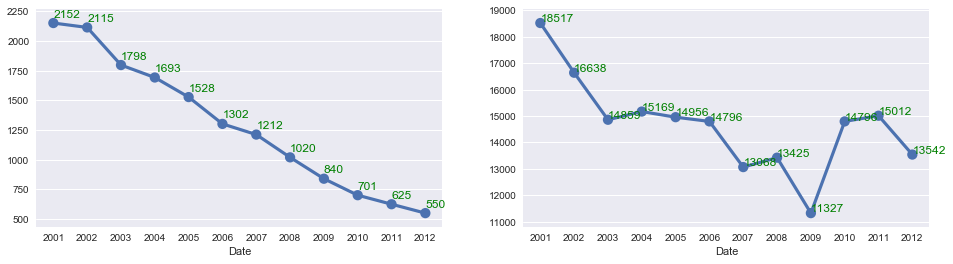

In [154]:
yearwise_true=df3.groupby(df3['Date'].dt.year)['Date'].count()
plt.figure(figsize=(16,4))
plt.subplot(121)
ax=sns.pointplot(x=yearwise_true.index,y=yearwise_true.values,kind='point')
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(), yearwise_true.values)]
df4=df[df["Arrest"]==False]
yearwise_false=df4.groupby(df4['Date'].dt.year)['Date'].count()
plt.subplot(122)
ax=sns.pointplot(x=yearwise_false.index,y=yearwise_false.values,kind='point')
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(), yearwise_false.values)]
#propotion for 2001=2152/(18517+2157)

# Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

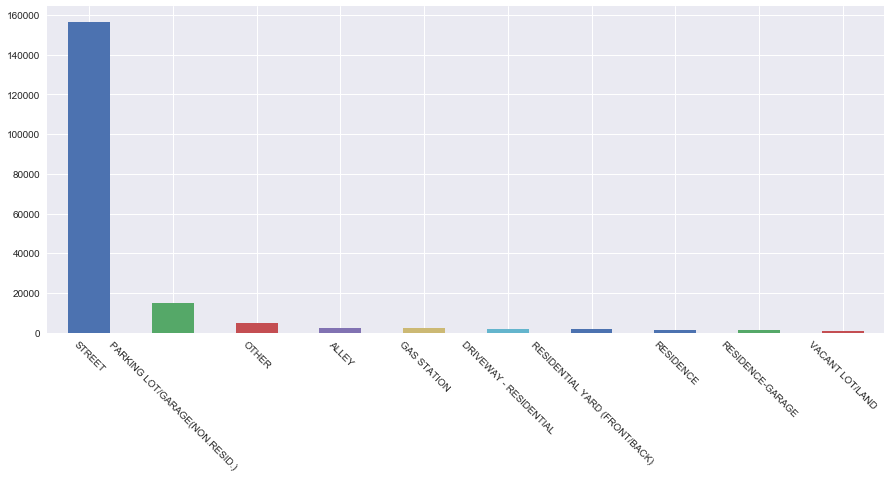

In [163]:
plt.figure(figsize=(15,6))
cat=df['LocationDescription'].value_counts().head(10)
cat.plot(kind='bar')
plt.xticks(rotation=-45)

# Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5? 

In [165]:
top5=df[(df['LocationDescription']=='STREET') | (df['LocationDescription']=='PARKING LOT/GARAGE(NON.RESID.)')| (df['LocationDescription']=='ALLEY')
      | (df['LocationDescription']=='GAS STATION')| (df['LocationDescription']=='DRIVEWAY - RESIDENTIAL')]
print(top5.shape[0])

177510


# On which day of the week do the most motor vehicle thefts at gas stations happen? 

[280, 270, 273, 282, 332, 338, 336]


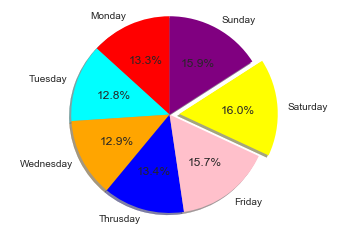

In [174]:
bar=top5[top5['LocationDescription'].str.contains('GAS STATION')].groupby(df2['Date'].dt.weekday)['Date'].count()
#df5=df[df.LocationDescription.str.contains('GAS STATION')]
#df5.groupby(df2['Date'].dt.weekday)['Date'].count()
#bar.plot(kind='line')
bar=list(bar)
name='Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'
explode=(0,0,0,0,0,0.1,0)
print(bar)
colors=['Red','cyan','orange','blue','pink','yellow','purple']
plt.pie(bar,explode=explode,labels=name,autopct='%1.1f%%',shadow=True,colors=colors, startangle=90)
plt.axis('equal')
plt.show()
